In [27]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('/content/data.csv')
df

,Date,A32,AAA,AAM,AAS,AAT,AAV,ABB,ABC,ABI,...,BED,BEL,BFC,BGW,BHA,BHC,BHG,BHK,BHN,BHP
0,2022-12-23,30.2,7.15,12.15,9.5,5.11,4.5,8.0,5.5,35.9,...,39.9,11.7,17.55,17.2,15.0,2.2,13.5,12.2,46.50,7.1
1,2022-12-22,30.2,7.20,11.80,9.9,5.20,4.8,8.2,4.9,35.7,...,39.9,11.7,17.90,17.2,14.5,2.4,13.5,12.2,46.50,7.1
2,2022-12-21,30.2,7.12,11.50,9.9,5.10,4.9,8.1,4.9,33.9,...,39.9,11.7,17.80,17.2,14.5,2.4,13.5,12.2,45.00,7.4
3,2022-12-20,30.2,7.18,11.65,10.2,4.98,5.0,8.2,4.9,34.6,...,39.9,11.7,18.40,17.2,14.3,2.4,13.5,12.2,46.70,7.4
4,2022-12-19,30.2,7.65,11.65,10.7,5.19,5.2,8.4,4.9,33.6,...,39.9,11.7,18.75,17.2,12.5,2.4,13.5,12.2,45.75,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2020-01-08,24.5,12.00,12.50,NaN,NaN,8.4,NaN,9.7,30.0,...,39.0,11.7,11.35,12.0,6.9,2.7,12.1,16.5,77.00,9.2
742,2020-01-07,24.5,12.40,12.50,NaN,NaN,8.5,NaN,9.8,30.0,...,39.0,13.0,11.60,12.0,6.9,2.7,12.1,19.3,77.60,9.2
743,2020-01-06,24.5,12.30,12.50,NaN,NaN,8.4,NaN,10.6,30.0,...,39.0,13.0,11.50,12.0,6.9,2.7,12.1,22.7,77.90,9.2
744,2020-01-03,24.5,12.70,12.50,NaN,NaN,8.4,NaN,9.7,30.0,...,39.0,13.0,11.55,12.0,6.9,2.7,12.1,22.7,78.00,9.2


In [30]:
df = df.fillna(method='ffill')

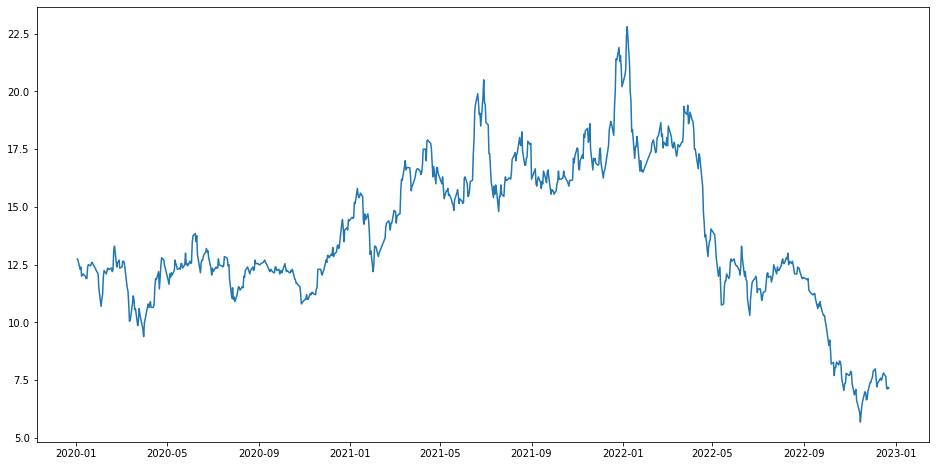

In [31]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["AAA"],label='Close Price history')

In [32]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','AAA'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["AAA"][i]=data["AAA"][i]

new_dataset = new_dataset.iloc[:580,:]
new_dataset

,Date,AAA
0,2020-01-02 00:00:00,12.75
1,2020-01-03 00:00:00,12.7
2,2020-01-06 00:00:00,12.3
3,2020-01-07 00:00:00,12.4
4,2020-01-08 00:00:00,12.0
...,...,...
575,2022-04-25 00:00:00,12.85
576,2022-04-26 00:00:00,13.3
577,2022-04-27 00:00:00,13.5
578,2022-04-28 00:00:00,13.55


In [33]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:502,:]
valid_data=final_dataset[502:,:]


In [35]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset=new_dataset.values
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data, x_train_data.shape + (1,))

In [52]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=10,batch_size=1,verbose=2)

Epoch 1/10
442/442 - 12s - loss: 0.0079 - 12s/epoch - 27ms/step
Epoch 2/10
442/442 - 9s - loss: 0.0032 - 9s/epoch - 21ms/step
Epoch 3/10
442/442 - 9s - loss: 0.0023 - 9s/epoch - 21ms/step
Epoch 4/10
442/442 - 9s - loss: 0.0023 - 9s/epoch - 21ms/step
Epoch 5/10
442/442 - 9s - loss: 0.0021 - 9s/epoch - 21ms/step
Epoch 6/10
442/442 - 9s - loss: 0.0019 - 9s/epoch - 21ms/step
Epoch 7/10
442/442 - 11s - loss: 0.0016 - 11s/epoch - 26ms/step
Epoch 8/10
442/442 - 9s - loss: 0.0014 - 9s/epoch - 21ms/step
Epoch 9/10
442/442 - 9s - loss: 0.0014 - 9s/epoch - 21ms/step
Epoch 10/10
442/442 - 9s - loss: 0.0011 - 9s/epoch - 21ms/step


In [53]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

3/3 [==============================] - 1s 15ms/step


In [54]:
lstm_model.save("saved_model.h5")

<ipython-input-62-bafdf7edc5f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


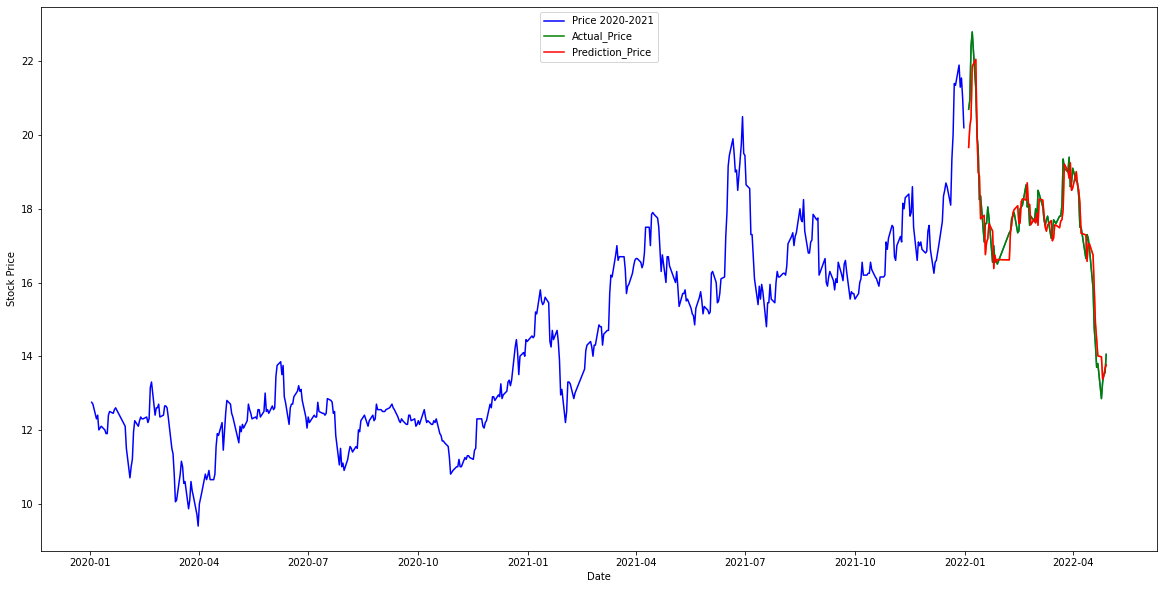

In [62]:
train_data=new_dataset[:502]
valid_data=new_dataset[502:]
valid_data['Predictions']=predicted_closing_price

plt.plot(valid_data[['AAA',"Predictions"]])
line1, = plt.plot(train_data["AAA"], label="Price 2020-2021", color="blue")
line2, = plt.plot(valid_data['AAA'], label="Actual_Price", color="green")
line3, =plt.plot(valid_data[["Predictions"]], label="Prediction_Price",color="red")
leg = plt.legend(loc='upper center')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()